## Decision Tree

### Understanding the Impurity Measures for classification in decision tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def gini(probas):
    return np.array([1- (p ** 2 + (1-p) ** 2) for p in probas])


def entropy(probas):
    return np.array([-1 * (p * np.log2(p) + (1-p) * np.log2(1-p)) for p in probas])

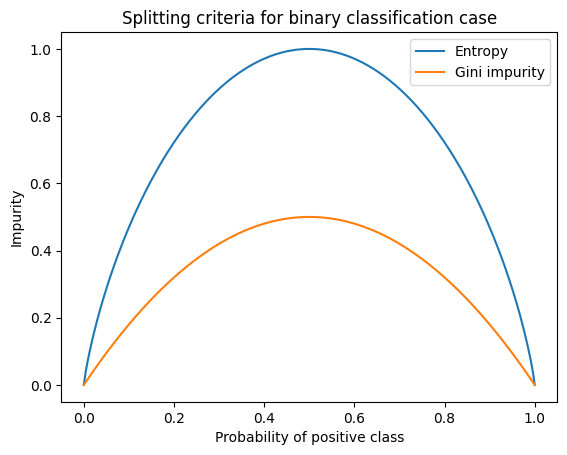

In [2]:
eps = 1e-10  # remove log0 to occur.
probas = np.linspace(eps, 1-eps, 250)
plt.plot(probas, entropy(probas), label="Entropy")
plt.plot(probas, gini(probas), label="Gini impurity")
plt.title("Splitting criteria for binary classification case")
plt.xlabel("Probability of positive class")
plt.ylabel("Impurity")
plt.legend()
plt.show()

### SkLearn Decision Tree Classification

sklearn decision tree classifier documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [4]:
iris = load_iris()

X = iris['data']
y = iris['target']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) # 70% training and 30% test

X_train.shape, X_test.shape

((105, 4), (45, 4))

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

clf

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
# Predict on train dataset
y_pred_train = clf.predict(X_train)

# Evaluating on train dataset
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")

Accuracy: 1.0000


In [32]:
# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluating the model on train dataset
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 0.9333


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



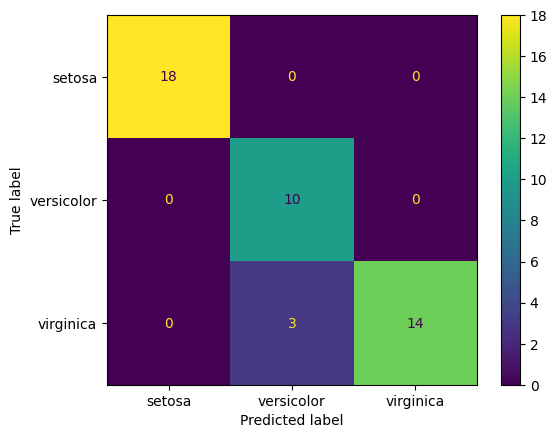

In [34]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=iris['target_names']).plot();

### Visualizing the Decision Tree

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

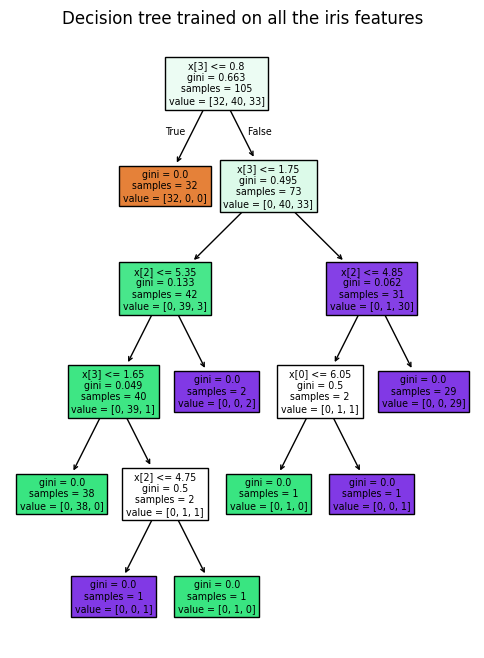

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(6,8))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

### Visualizing the Decision Boundary

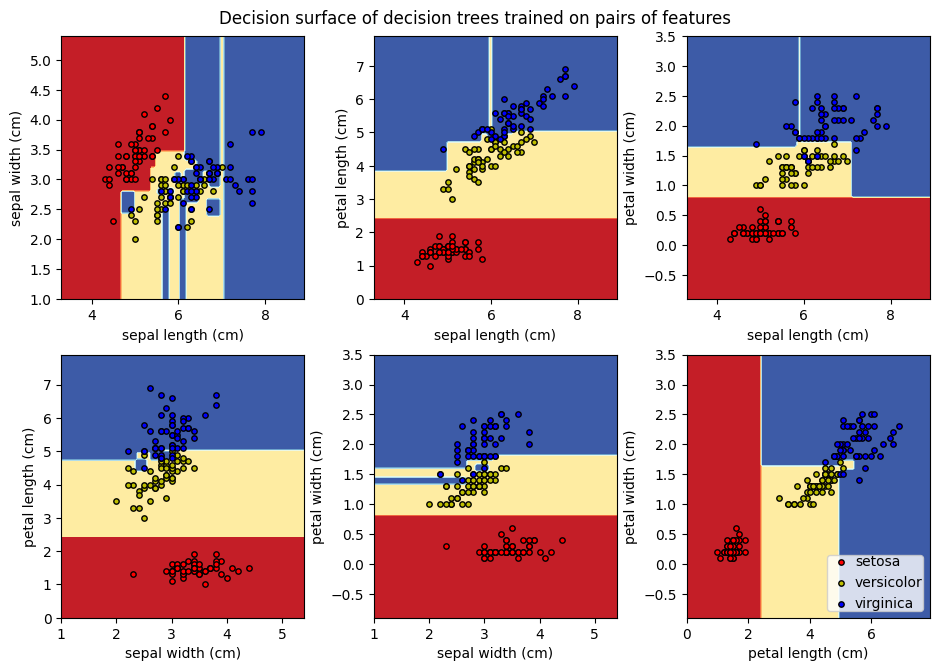

In [38]:
from sklearn.inspection import DecisionBoundaryDisplay

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(10,7))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.asarray(y == i).nonzero()
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

### Decision boundary created by Decision Tree for different types of datasets 

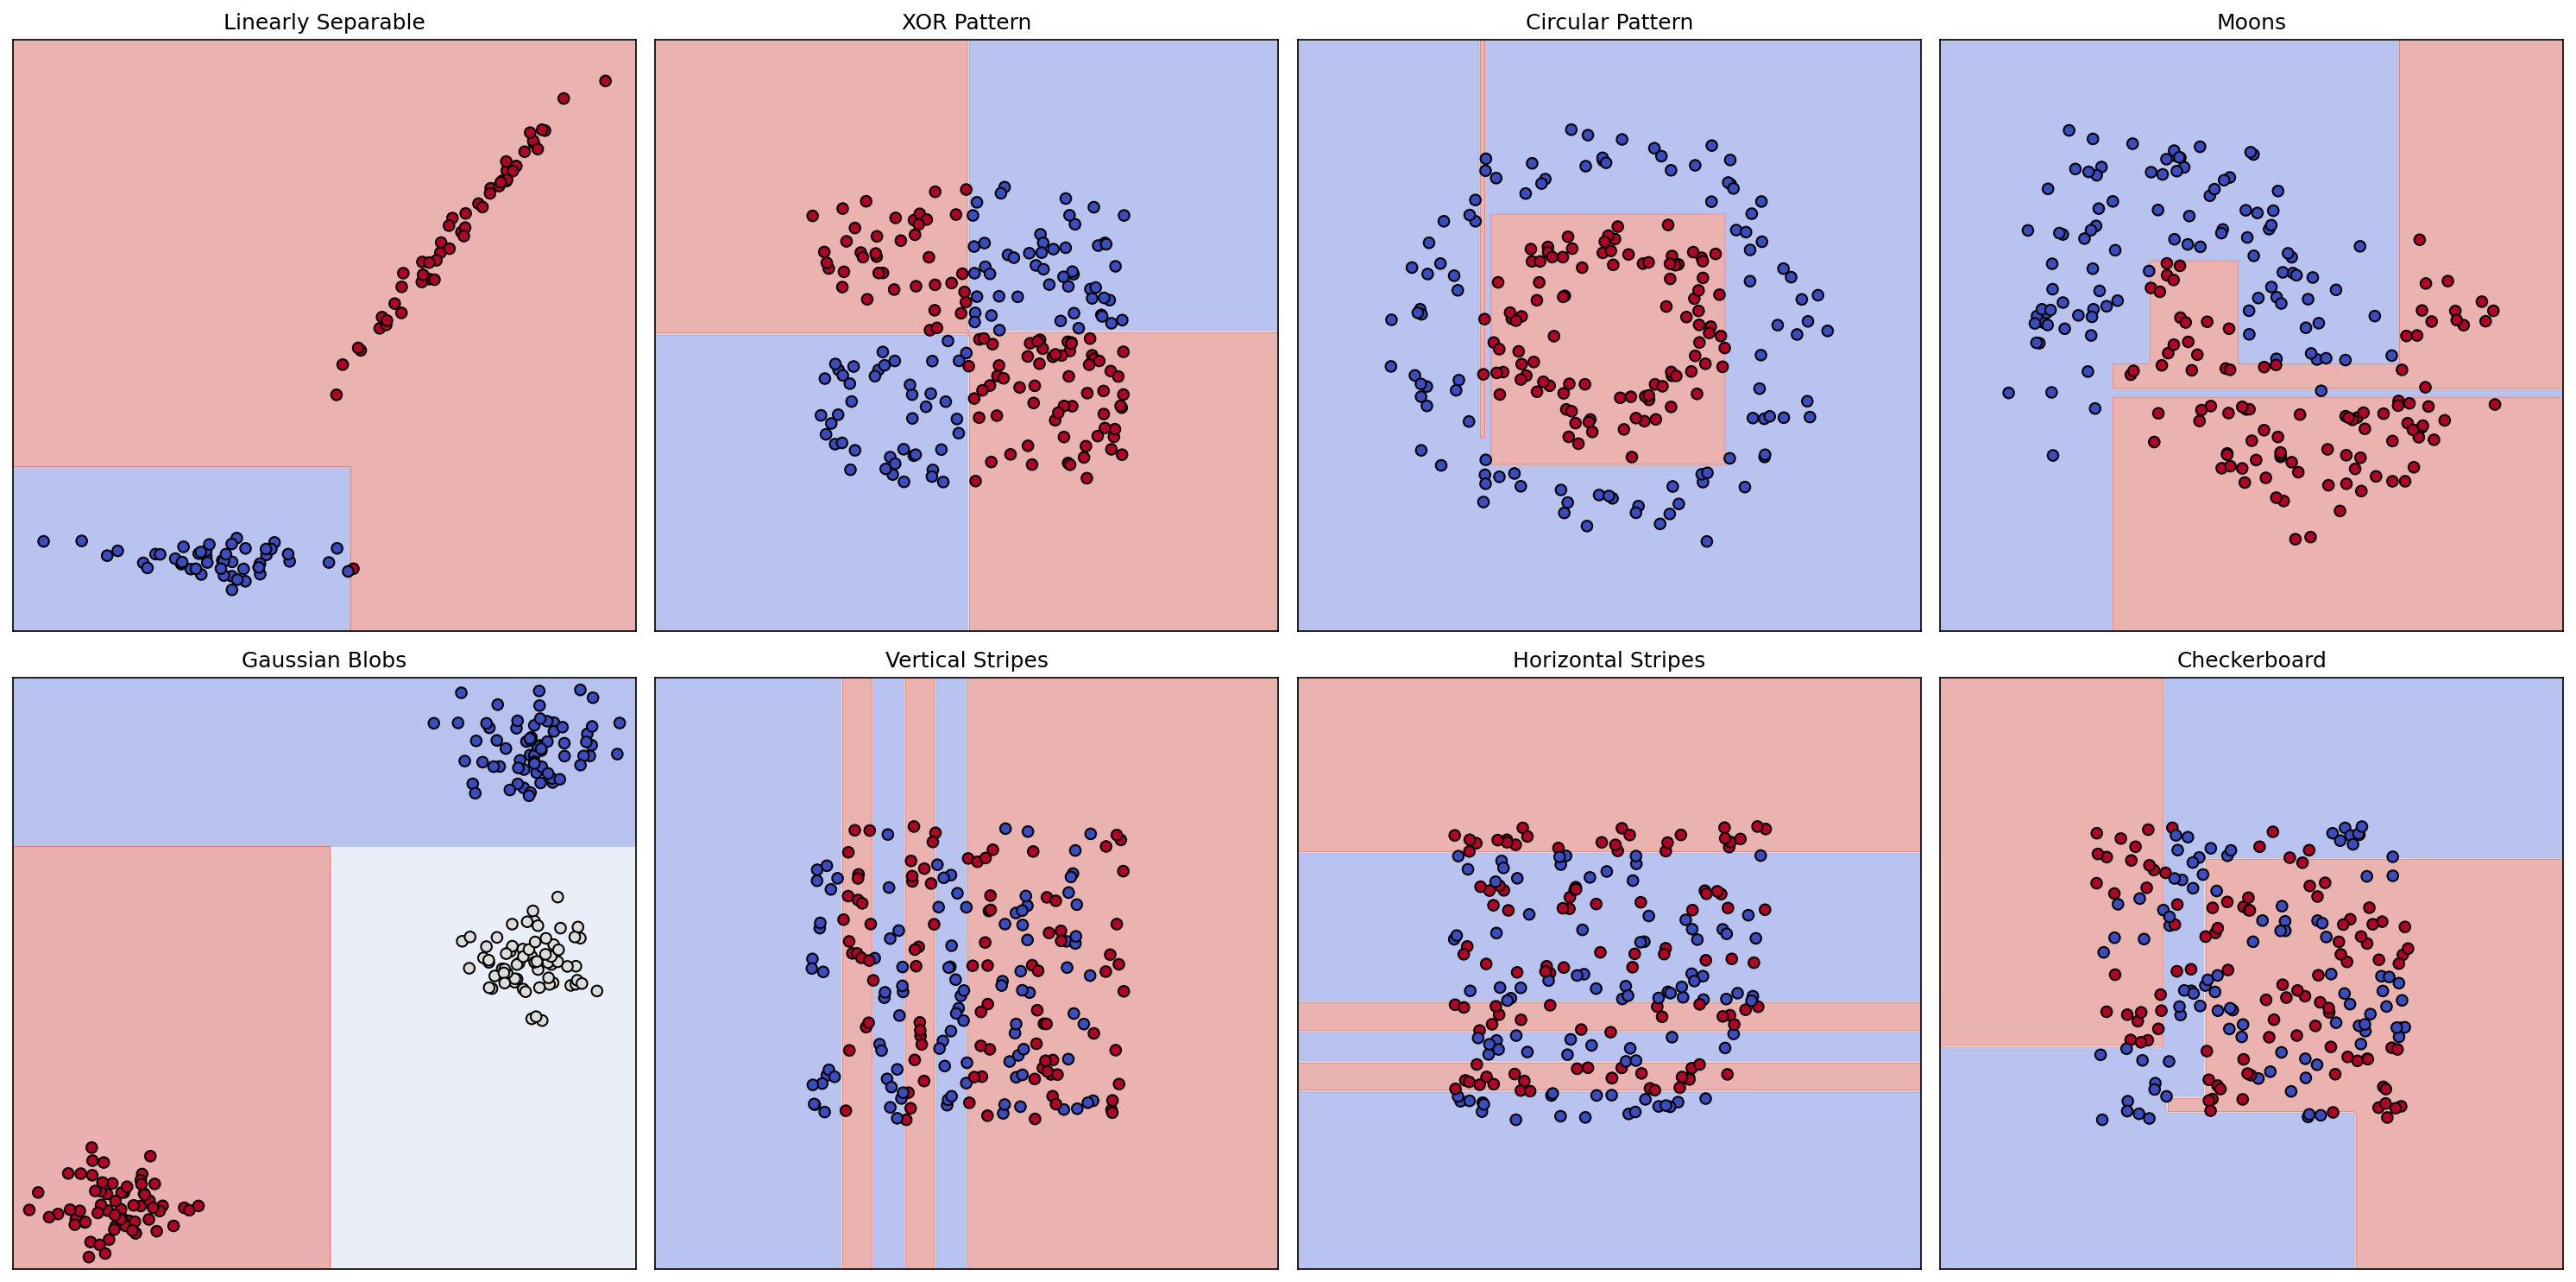

In [39]:
from sklearn.datasets import make_classification, make_moons, make_circles, make_blobs

# Helper function to plot decision boundaries
def plot_decision_boundary(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

# Generate multiple 2D datasets
def generate_datasets():
    datasets = []

    # 1. Linearly separable
    X1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, n_samples=100, class_sep=2)
    datasets.append((X1, y1, "Linearly Separable"))

    # 2. XOR pattern
    X2 = np.random.rand(200, 2)
    y2 = np.logical_xor(X2[:, 0] > 0.5, X2[:, 1] > 0.5).astype(int)
    datasets.append((X2, y2, "XOR Pattern"))

    # 3. Circular
    X3, y3 = make_circles(n_samples=200, noise=0.1, factor=0.5)
    datasets.append((X3, y3, "Circular Pattern"))

    # 4. Moons
    X4, y4 = make_moons(n_samples=200, noise=0.2)
    datasets.append((X4, y4, "Moons"))

    # 5. Gaussian blobs
    X5, y5 = make_blobs(n_samples=200, centers=3, random_state=8)
    datasets.append((X5, y5, "Gaussian Blobs"))

    # 6. Vertical stripes
    X6 = np.random.rand(200, 2)
    y6 = ((X6[:, 0] * 10).astype(int)) % 2
    datasets.append((X6, y6, "Vertical Stripes"))

    # 7. Horizontal stripes
    X7 = np.random.rand(200, 2)
    y7 = ((X7[:, 1] * 10).astype(int)) % 2
    datasets.append((X7, y7, "Horizontal Stripes"))

    # 8. Checkerboard
    X8 = np.random.rand(200, 2)
    y8 = (((X8[:, 0] * 4).astype(int) + (X8[:, 1] * 4).astype(int)) % 2)
    datasets.append((X8, y8, "Checkerboard"))

    return datasets

# Main plotting function
def plot_all_decision_boundaries():
    datasets = generate_datasets()
    fig, axes = plt.subplots(2, 4, figsize=(20, 10), dpi=150)
    axes = axes.ravel()

    for i, (X, y, title) in enumerate(datasets):
        clf = DecisionTreeClassifier(max_depth=5, random_state=0)
        clf.fit(X, y)
        plot_decision_boundary(X, y, clf, axes[i], title)

    plt.tight_layout()
    plt.show()

# Run the plotting
plot_all_decision_boundaries()


### Decision Tree Regression

sklearn decision tree regressor documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

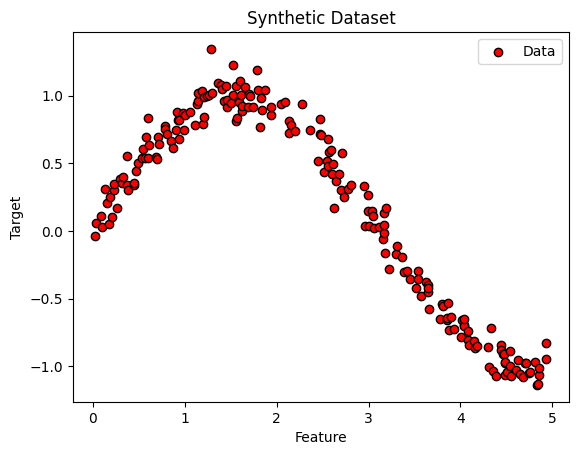

In [41]:
# Creating a synthetic dataset

np.random.seed(42)
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

plt.scatter(X, y, color='red', label='Data', edgecolor='k')
plt.title("Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [42]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Fitting decision tree regression model

regressor = DecisionTreeRegressor(max_depth=4,random_state=42)

regressor.fit(X_train, y_train)

regressor

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [47]:
# predicting on test dataset

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0194


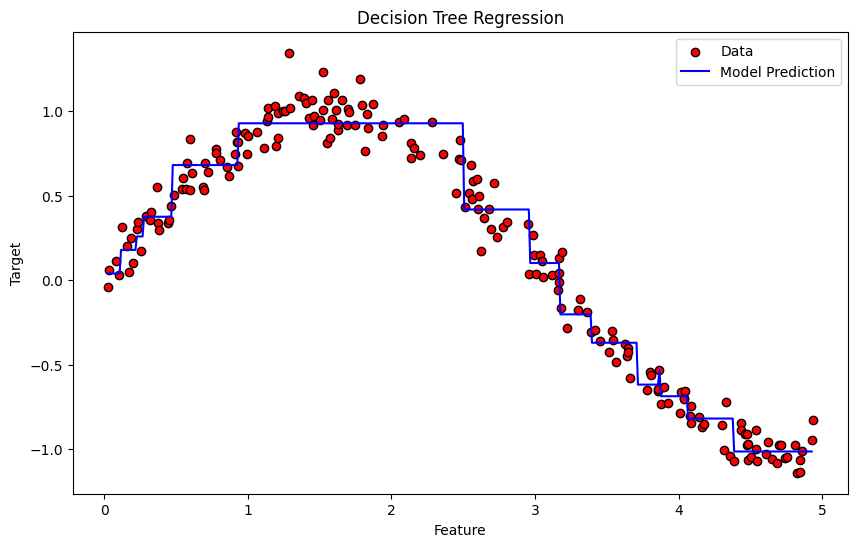

In [50]:
# visualization

X_grid = np.arange(np.min(X), np.max(X), 0.01).reshape(-1,1)
y_grid_pred = regressor.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', edgecolor='k', label='Data')
plt.plot(X_grid, y_grid_pred, color='blue', label='Model Prediction')
plt.title("Decision Tree Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()